In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

file_path = "../data/data-ml.csv"
df = pd.read_csv(file_path)
df.head()


,id,Country,year,Yearly Score,goal1,goal2,goal3,goal4,goal5,goal6,...,goal8,goal9,goal10,goal11,goal12,goal13,goal14,goal15,goal16,goal17
0,AFG,Afghanistan,2020,"47,47",29.00,38,37,43,26,49,...,47,11,NaN,36,95,99,NaN,78,45,43
1,AFG,Afghanistan,2021,"46,27",20.00,38,35,35,29,50,...,45,11,NaN,34,95,99,NaN,78,45,43
2,AFG,Afghanistan,2019,"46,13",30.00,40,36,43,24,45,...,46,11,NaN,35,95,99,NaN,65,46,41
3,AFG,Afghanistan,2022,"45,60",17.00,38,36,35,18,51,...,43,17,NaN,35,96,99,NaN,77,42,43
4,AFG,Afghanistan,2018,"45,53",30.00,41,37,41,21,42,...,47,11,NaN,33,95,99,NaN,65,46,41


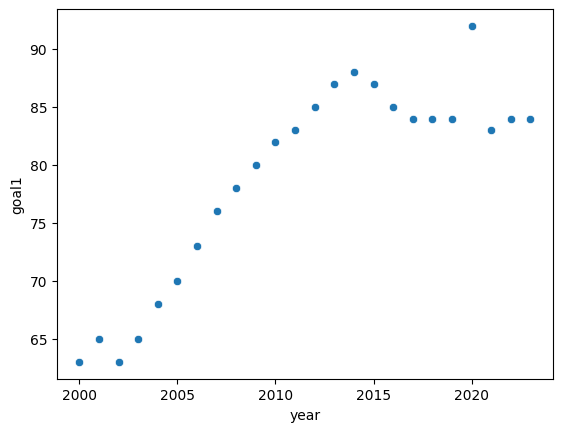

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x="year", y="goal1", data=df[df["Country"] == "Brazil"])
plt.show()

In [25]:
for goal in range(1, 17):
    print('goal'+goal)
for country in df["Country"].unique():
    print(country)

TypeError: can only concatenate str (not "int") to str

In [21]:
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.formula.api import ols # ordinary least squares
#first argument is formula with explanatory and 
test = ols("year ~ goal9", data=df[df["Country"] == "Brazil"]).fit()
print(test.params)
test.summary()

Intercept   1979.62
goal9          0.59
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   year   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     428.3
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           6.52e-16
Time:                        17:30:06   Log-Likelihood:                -44.263
No. Observations:                  24   AIC:                             92.53
Df Residuals:                      22   BIC:                             94.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1979.6180      1.575   1257.073      0.000    1976.352    1982.884
goal9          0.5863      0.028     20.694      0.000       0.528       0.645
==============================================================================
Omnibus:                        2.770   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.355
Skew:                          -0.727   Prob(JB):                        0.308
Kurtosis:                       2.508   Cond. No.                         268.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""